In [2]:
import pandas as pd

#load the data file

file_path = r"C:\Users\educa\Downloads\EICV4_a\cs_s1_s2_s3_s4_s6a_s6e_s6f_person.dta"
data = pd.read_stata(file_path)

#print the first 5 rows

print(data.head())

       hhid     province    district ur2012 ur2_2012       region     weight  \
0  100001.0  Kigali City  Nyarugenge  Urban    Urban  Kigali City  71.459792   
1  100001.0  Kigali City  Nyarugenge  Urban    Urban  Kigali City  71.459792   
2  100001.0  Kigali City  Nyarugenge  Urban    Urban  Kigali City  71.459792   
3  100001.0  Kigali City  Nyarugenge  Urban    Urban  Kigali City  71.459792   
4  100001.0  Kigali City  Nyarugenge  Urban    Urban  Kigali City  71.459792   

                                             hhtype  s0q19m  s0q19y  ...  \
0  Replaced different household (dependent code 95)    11.0    13.0  ...   
1  Replaced different household (dependent code 95)    11.0    13.0  ...   
2  Replaced different household (dependent code 95)    11.0    13.0  ...   
3  Replaced different household (dependent code 95)    11.0    13.0  ...   
4  Replaced different household (dependent code 95)    11.0    13.0  ...   

   s6fq3  s6fq4 s6fq5 s6fq6 s6fq7  s6fq8  s6fq9  s6fq10 s6fq11

In [3]:
#display all column names
print(data.columns.tolist())

['hhid', 'province', 'district', 'ur2012', 'ur2_2012', 'region', 'weight', 'hhtype', 's0q19m', 's0q19y', 'pop_wt', 'clust', 'rwanda', 'surveyh', 'quintile', 'poverty', 'Consumption', 'pid', 's1q1', 's1q2', 's1q3y', 's1q3m', 's1q4', 's1q5', 's1q6', 's1q7', 's1q8', 's1q9', 's1q10', 's1q11', 's1q12', 's1q13', 's1q14', 's1q15', 's2q1', 's2q2', 's2q3y', 's2q3m', 's2q4', 's2q5', 's2q6', 's2q7', 's2q8', 's3q1', 's3q2', 's3q3', 's3q4', 's3q5', 's3q6', 's3q7', 's4aq1', 's4aq2', 's4aq3', 's4aq4a', 's4aq4b', 's4aq5', 's4aq6a', 's4aq6b', 's4aq7', 's4aq8', 's4aq9', 's4aq10', 's4aq11a', 's4aq11b', 's4aq11c', 's4aq11d', 's4aq11e', 's4aq11f', 's4aq11g', 's4aq11h', 's4aq12', 's4aq13', 's4aq14', 's4aq15', 's4aq16', 's4aq17', 's4bq1', 's4bq2', 's4bq3', 's4bq4', 's4bq5', 's4bq6', 's4bq7', 's4bq8', 's6aq2', 's6aq3', 's6aq4', 's6aq5', 's6aq6', 's6aq7a', 's6aq7b', 's6aq8', 's6eq1', 's6eq2', 's6eq3', 's6eq4', 's6eq5', 's6eq6', 's6eq7', 's6eq8', 's6eq9', 's6eq10', 's6eq11', 's6eq12a', 's6eq12b', 's6eq13', 's6e

In [4]:
# List of columns to extract 
columns_to_keep = ['poverty','province','ur2_2012','Consumption','s1q3y', 's3q2','s1q1','district','s4aq2']

#extract the columns

data_subset = data[columns_to_keep]
print(data_subset.head())



   poverty     province ur2_2012   Consumption s1q3y                s3q2  \
0      3.0  Kigali City    Urban  305390.90625  33.0  Without Disability   
1      3.0  Kigali City    Urban  305390.90625  16.0  Without Disability   
2      3.0  Kigali City    Urban  305390.90625  14.0  Without Disability   
3      3.0  Kigali City    Urban  305390.90625  10.0  Without Disability   
4      3.0  Kigali City    Urban  305390.90625  19.0  Without Disability   

     s1q1    district           s4aq2  
0  Female  Nyarugenge   Primary 6,7,8  
1    Male  Nyarugenge  Post primary 2  
2    Male  Nyarugenge   Primary 6,7,8  
3  Female  Nyarugenge       Primary 4  
4    Male  Nyarugenge       Primary 5  


In [5]:
# Cell 1: Check missing values in selected columns
print("Missing Values Before Cleaning:")
print(data_subset.isnull().sum())

# Handle missing values for critical columns
data_subset = data_subset.dropna(subset=['poverty', 'Consumption'])  # Critical columns

# Handle missing values in 's4aq2'
if 's4aq2' in data_subset.columns and pd.api.types.is_categorical_dtype(data_subset['s4aq2']):
    data_subset['s4aq2'] = data_subset['s4aq2'].cat.add_categories('Unknown')  # Add 'Unknown' as a category
data_subset['s4aq2'] = data_subset['s4aq2'].fillna('Unknown')  # Fill missing values with 'Unknown'

# Handle missing values in 's3q2'
if 's3q2' in data_subset.columns and pd.api.types.is_categorical_dtype(data_subset['s3q2']):
    data_subset['s3q2'] = data_subset['s3q2'].cat.add_categories('Unknown')  # Add 'Unknown' as a category
data_subset['s3q2'] = data_subset['s3q2'].fillna('Unknown')  # Fill missing values with 'Unknown'

# Check results
print("\nMissing Values After Cleaning:")
print(data_subset.isnull().sum())


Missing Values Before Cleaning:
poverty            0
province           0
ur2_2012           0
Consumption        0
s1q3y              0
s3q2              48
s1q1               0
district           0
s4aq2          17753
dtype: int64

Missing Values After Cleaning:
poverty        0
province       0
ur2_2012       0
Consumption    0
s1q3y          0
s3q2           0
s1q1           0
district       0
s4aq2          0
dtype: int64


In [6]:
print(data_subset.head())

   poverty     province ur2_2012   Consumption s1q3y                s3q2  \
0      3.0  Kigali City    Urban  305390.90625  33.0  Without Disability   
1      3.0  Kigali City    Urban  305390.90625  16.0  Without Disability   
2      3.0  Kigali City    Urban  305390.90625  14.0  Without Disability   
3      3.0  Kigali City    Urban  305390.90625  10.0  Without Disability   
4      3.0  Kigali City    Urban  305390.90625  19.0  Without Disability   

     s1q1    district           s4aq2  
0  Female  Nyarugenge   Primary 6,7,8  
1    Male  Nyarugenge  Post primary 2  
2    Male  Nyarugenge   Primary 6,7,8  
3  Female  Nyarugenge       Primary 4  
4    Male  Nyarugenge       Primary 5  


In [7]:
frequency_table = data['poverty'].value_counts()
print(frequency_table)

poverty
3.0    40274
2.0    15135
1.0    10672
Name: count, dtype: int64


In [8]:
frequency_table_educ = data['s4aq2'].value_counts()
print(frequency_table_educ)

s4aq2
Primary 6,7,8         7577
Primary 3             5626
Primary 4             5530
Primary 2             5313
Primary 1             5015
Primary 5             4842
Not complete P1       4187
Pre-primary           1878
Secondary 6           1370
Secondary 2           1292
Secondary 1           1272
Secondary 3           1022
Secondary 5            676
Secondary 4            644
Post primary 3         426
University 4           407
University 2           192
Post primary 2         189
University 3           188
University 1           160
Post primary 1         142
Post primary 6,7,8     139
University 5            89
Post primary 4          50
University 6            45
Post primary 5          39
University 7            17
Missing                  1
Name: count, dtype: int64


In [9]:
import pandas as pd

file_path = r"C:\Users\educa\Downloads\EICV4_a\cs_s1_s2_s3_s4_s6a_s6e_s6f_person.dta"
data = pd.read_stata(file_path)

categories = data['s4aq2'].unique()

# Print each category on a new line
for category in categories:
    print(category)

Primary 6,7,8
Post primary 2
Primary 4
Primary 5
Secondary 6
Post primary 1
Post primary 3
Post primary 4
Secondary 4
Secondary 3
Primary 1
nan
University 2
Primary 3
Primary 2
Post primary 6,7,8
University 1
Secondary 5
Secondary 2
Pre-primary
University 4
Secondary 1
University 3
Not complete P1
University 5
University 7
Post primary 5
University 6
Missing


In [10]:
# Cell 2: Fix education mapping (update your dictionary)
education_mapping = {
    'Pre-primary': 'Nursery',
    'Primary 1': 'Primary',
    'Primary 2': 'Primary',
    'Primary 3': 'Primary',
    'Primary 4': 'Primary',
    'Primary 5': 'Primary',
    'Primary 6,7,8': 'Primary',
    'Not complete P1': 'Primary Dropout',
    'Secondary 1': 'Secondary',
    'Secondary 2': 'Secondary',
    'Secondary 3': 'Secondary',
    'Secondary 4': 'Secondary',
    'Secondary 5': 'Secondary',
    'Post primary 1': 'Post-Secondary',
    'Post primary 2': 'Post-Secondary',
    'Post primary 3': 'Post-Secondary',
    'Post primary 4': 'Post-Secondary',
    'Post primary 5': 'Post-Secondary',
    'Post primary 6,7,8': 'Post-Secondary',
    'University 1': 'Bachelors',
    'University 2': 'Bachelors',
    'University 3': 'Bachelors',
    'University 4': 'Masters',
    'University 5': 'Masters',
    'University 6': 'PhD',
    'University 7': 'PhD',
    'Missing': 'Unknown',
    'nan': 'Unknown',
    'Unknown' :'Unknown' 
}

data_subset['education_level'] = data_subset['s4aq2'].map(education_mapping)
print(data_subset[['s4aq2', 'education_level']].head(20))


             s4aq2 education_level
0    Primary 6,7,8         Primary
1   Post primary 2  Post-Secondary
2    Primary 6,7,8         Primary
3        Primary 4         Primary
4        Primary 5         Primary
5   Post primary 2  Post-Secondary
6      Secondary 6             NaN
7   Post primary 1  Post-Secondary
8   Post primary 3  Post-Secondary
9    Primary 6,7,8         Primary
10     Secondary 6             NaN
11  Post primary 4  Post-Secondary
12     Secondary 4       Secondary
13     Secondary 3       Secondary
14   Primary 6,7,8         Primary
15     Secondary 6             NaN
16   Primary 6,7,8         Primary
17       Primary 1         Primary
18         Unknown         Unknown
19         Unknown         Unknown


Poverty Vs Educational analysis

In [ ]:
#  Poverty vs Education Analysis
poverty_education = pd.crosstab(
    data_subset['education_level'], 
    data_subset['poverty'], 
    margins=True
).sort_values('All', ascending=False)

print("Poverty Distribution by Education Level:")
print(poverty_education)

Poverty Distribution by Education Level:
poverty            1.0    2.0    3.0    All
education_level                            
All              10643  15063  39005  64711
Primary           5521   8083  20299  33903
Unknown           3568   4565   9621  17754
Secondary          287    700   3919   4906
Primary Dropout    971   1186   2030   4187
Nursery            240    381   1257   1878
Post-Secondary      51    132    802    985
Bachelors            4     11    525    540
Masters              1      4    491    496
PhD                  0      1     61     62


Poverty Vs province Analysis 

In [ ]:
# Poverty vs province Analysis
poverty_education = pd.crosstab(
    data_subset['province'], 
    data_subset['poverty'], 
    margins=True
).sort_values('All', ascending=False)

print("Poverty Distribution by province :")
print(poverty_education)

Poverty Distribution by province :
poverty              1.0    2.0    3.0    All
province                                     
All                10672  15135  40274  66081
Southern Province   2187   4364  10660  17211
Western Province    3351   3780   8828  15959
Eastern Province    2404   3494   9786  15684
Northern Province   2216   2854   6001  11071
Kigali City          514    643   4999   6156


Average consumption vs Province  , Average consumption vs District

In [13]:
# Consumption Analysis
print("\nAverage Consumption by Province:")
print(data_subset.groupby('province')['Consumption'].mean().sort_values(ascending=False))

print("\nTop 5 Districts by Consumption:")
print(data_subset.groupby('district')['Consumption'].mean().nlargest(5))


Average Consumption by Province:
province
Kigali City          630632.500000
Southern Province    275067.875000
Eastern Province     264665.281250
Western Province     256286.468750
Northern Province    237683.296875
Name: Consumption, dtype: float32

Top 5 Districts by Consumption:
district
Kicukiro      817566.50000
Gasabo        565327.12500
Nyarugenge    501589.40625
Muhanga       388904.96875
Rubavu        373110.43750
Name: Consumption, dtype: float32


Poverty Distribution 

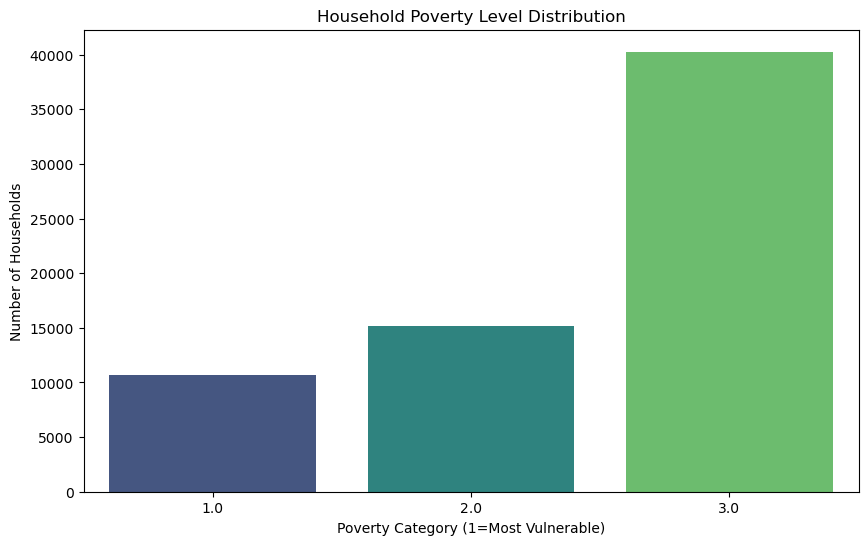

In [ ]:
# Poverty Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='poverty', data=data_subset, palette='viridis')
plt.title("Household Poverty Level Distribution")
plt.xlabel("Poverty Category (1=Most Vulnerable)")
plt.ylabel("Number of Households")
plt.show()

Consumption by Education 

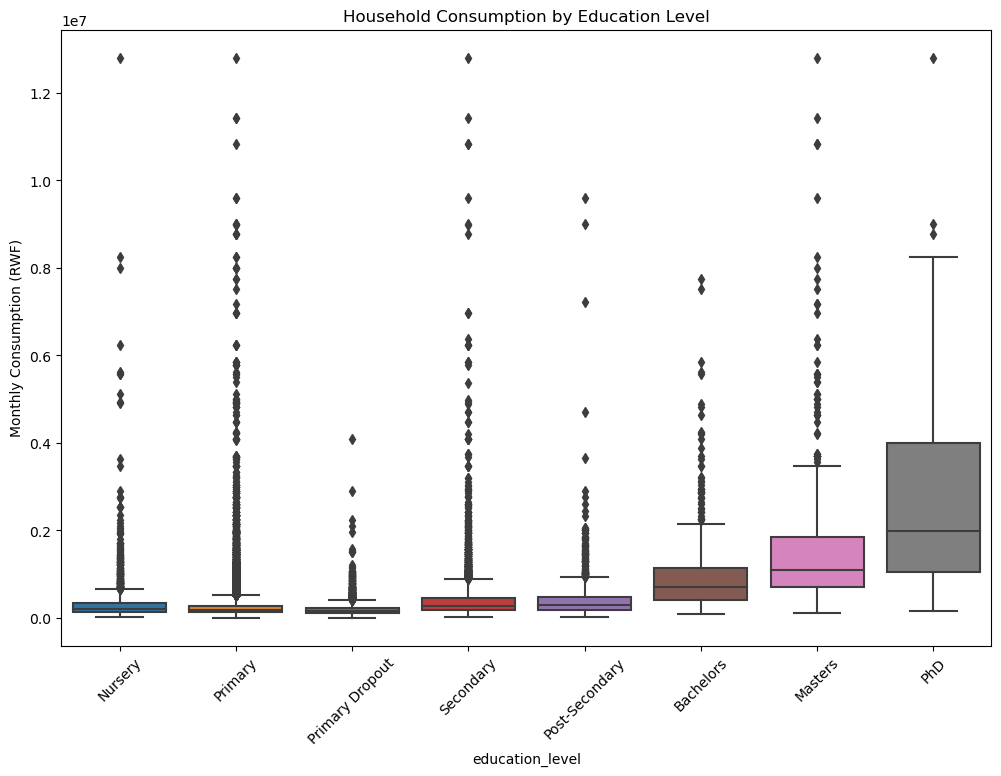

In [ ]:
# Education vs Consumption
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='education_level', 
    y='Consumption', 
    data=data_subset, 
    order=['Nursery', 'Primary', 'Primary Dropout', 'Secondary', 'Post-Secondary', 'Bachelors', 'Masters', 'PhD']
)
plt.xticks(rotation=45)
plt.title("Household Consumption by Education Level")
plt.ylabel("Monthly Consumption (RWF)")
plt.show()

Poverty status by Province

In [16]:
# Poverty distribution by province
pov_province = data_subset.groupby('province')['poverty'].agg(['mean', 'count'])
print("Poverty Rate by Province:")
print(pov_province.sort_values('mean', ascending=False))

# Gender poverty gap analysis
if 's1q1' in data_subset:
    gender_poverty = data_subset.groupby('s1q1')['poverty'].mean()
    print("\nPoverty Rate by Gender:")
    print(gender_poverty)

Poverty Rate by Province:
                       mean  count
province                          
Kigali City        2.728558   6156
Southern Province  2.492301  17211
Eastern Province   2.470671  15684
Western Province   2.343192  15959
Northern Province  2.341884  11071

Poverty Rate by Gender:
s1q1
Male      2.458122
Female    2.438689
Name: poverty, dtype: float64


In [ ]:
Urban

In [18]:
# Urban vs Rural consumption comparison
ur_consumption = data_subset.groupby('ur2_2012')['Consumption'].agg(['mean', 'median'])
print("\nUrban vs Rural Consumption:")
print(ur_consumption)

# Top/Bottom 5 education levels by consumption
edu_consumption = data_subset.groupby('education_level')['Consumption'].mean().sort_values(ascending=False)
print("\nConsumption by Education Level:")
print(edu_consumption)


Urban vs Rural Consumption:
                   mean         median
ur2_2012                              
Urban     685255.875000  379068.921875
Rural     220482.109375  174042.406250

Consumption by Education Level:
education_level
PhD                2.787524e+06
Masters            1.621645e+06
Bachelors          9.813241e+05
Post-Secondary     4.488820e+05
Secondary          4.304966e+05
Nursery            3.491200e+05
Primary            2.626104e+05
Unknown            2.308687e+05
Primary Dropout    1.954818e+05
Name: Consumption, dtype: float32


In [19]:
# Education distribution by district
district_education = pd.crosstab(data_subset['district'], data_subset['education_level'], normalize='index') * 100
print("\nEducation Distribution by District (%):")
print(district_education.style.format("{:.1f}%"))

# Education-poverty correlation matrix
education_poverty = data_subset.groupby('education_level')['poverty'].mean().sort_values()
print("\nPoverty Rate by Education Level:")
print(education_poverty)


Education Distribution by District (%):

Poverty Rate by Education Level:
education_level
Primary Dropout    2.252926
Unknown            2.340937
Primary            2.435891
Nursery            2.541534
Secondary          2.740318
Post-Secondary     2.762437
Bachelors          2.964815
PhD                2.983871
Masters            2.987903
Name: poverty, dtype: float64


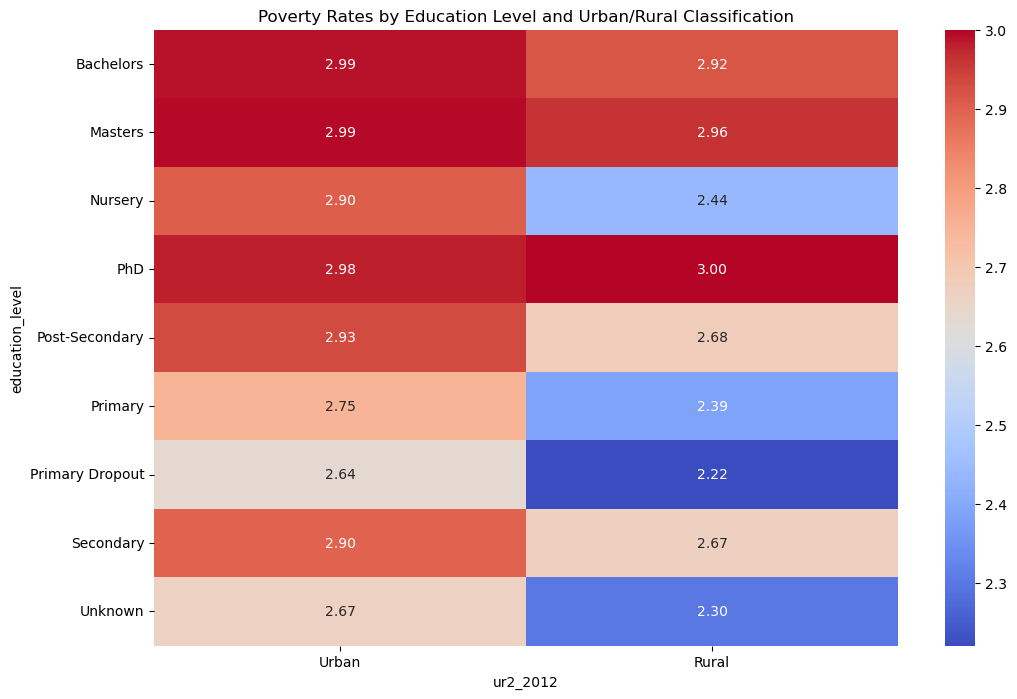

In [20]:
plt.figure(figsize=(12, 8))
pivot_table = data_subset.pivot_table(values='poverty', 
                                     index='education_level', 
                                     columns='ur2_2012', 
                                     aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Poverty Rates by Education Level and Urban/Rural Classification")
plt.show()

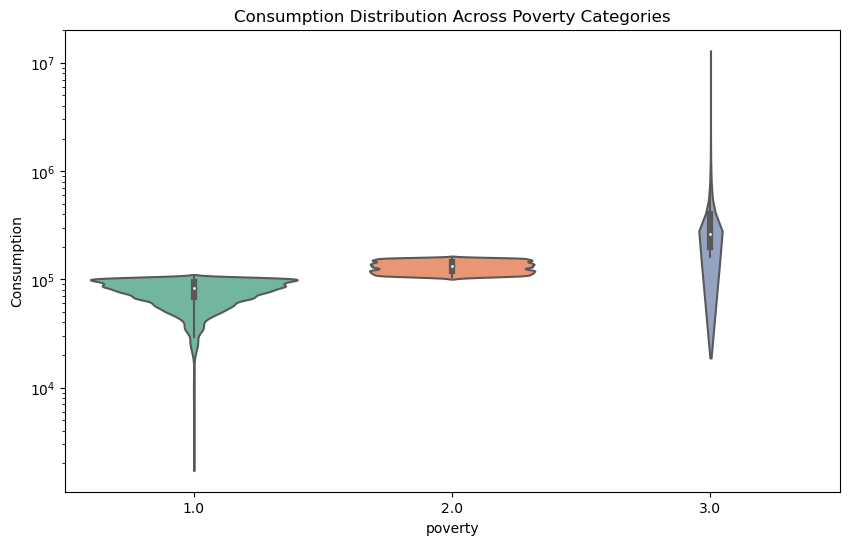

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='poverty', y='Consumption', data=data_subset, palette='Set2')
plt.yscale('log')  # For better visualization of skewed data
plt.title("Consumption Distribution Across Poverty Categories")
plt.show()

Chi-Square test for education and poverty relationship

In [22]:
from scipy.stats import chi2_contingency

# Chi-square test for education-poverty relationship
contingency_table = pd.crosstab(data_subset['education_level'], data_subset['poverty'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test results:\nChi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi-square test results:
Chi2 = 2264.21, p-value = 0.0000


In [23]:
# Generate PDF-ready summary
summary_report = f"""
Final Analysis Report ({pd.Timestamp.now().strftime('%Y-%m-%d')})

Key Findings:
1. Strong regional disparities: {pov_province.index[0]} has {pov_province['mean'].iloc[0]:.1%} poverty rate
2. Education impact: {edu_consumption.index[0]} graduates consume {edu_consumption.iloc[0]/edu_consumption.iloc[-1]:.1f}x more than {edu_consumption.index[-1]}
3. Gender gap: {abs(gender_poverty.diff().iloc[-1]):.1%} difference between genders

Recommendations:
- Prioritize education programs in {district_education.index[0]}
- Target social programs in {pov_province.index[0]} province
"""

with open('analysis_report.txt', 'w') as f:
    f.write(summary_report)

In [19]:
import pandas as pd

poverty_insurance = pd.crosstab(
    data_subset['s3q2'],  # Insurance column
    data_subset['poverty'],  # Poverty status column
    margins=True
).sort_values('All', ascending=False)

print("Poverty Distribution by Insurance:")
print(poverty_insurance)


Poverty Distribution by Insurance:
poverty                   1.0    2.0    3.0    All
s3q2                                              
All                     10672  15135  40274  66081
Without Disability      10215  14517  38638  63370
Disability in the legs    108    142    415    665
Very old                   64    121    361    546
Mental disability         119    125    243    487
Disability in the arms     57     87    175    319
Visual disability          36     33    156    225
Deaf and/or mute           44     57    124    225
Other, specify             15     29     85    129
Trauma                      4     13     50     67
Unknown                    10     11     27     48


In [20]:
poverty_ur2 = pd.crosstab(
    data_subset['ur2_2012'],  # Urban/Rural classification
    data_subset['poverty'],   # Poverty status
    margins=True
).sort_values('All', ascending=False)

print("Poverty Distribution by Urban/Rural classification (2012):")
print(poverty_ur2)


Poverty Distribution by Urban/Rural classification (2012):
poverty     1.0    2.0    3.0    All
ur2_2012                            
All       10672  15135  40274  66081
Rural     10124  14071  31302  55497
Urban       548   1064   8972  10584


In [21]:
poverty_province_s1q1 = pd.crosstab(
    [data_subset['province'], data_subset['s1q1']],  # Multiple categories
    data_subset['poverty'],  
    margins=True
).sort_values('All', ascending=False)

print("Poverty Distribution by Province and s1q1:")
print(poverty_province_s1q1)


Poverty Distribution by Province and s1q1:
poverty                     1.0    2.0    3.0    All
province          s1q1                              
All                       10672  15135  40274  66081
Southern Province Female   1177   2320   5549   9046
Western Province  Female   1814   2010   4587   8411
Southern Province Male     1010   2044   5111   8165
Eastern Province  Female   1263   1829   5059   8151
Western Province  Male     1537   1770   4241   7548
Eastern Province  Male     1141   1665   4727   7533
Northern Province Female   1135   1543   3103   5781
                  Male     1081   1311   2898   5290
Kigali City       Female    282    342   2524   3148
                  Male      232    301   2475   3008


In [22]:
poverty_rate_province_s1q1 = data_subset.groupby(['province', 's1q1'])['poverty'].value_counts(normalize=True).unstack()
print("Poverty Rate by Province and s1q1:")
print(poverty_rate_province_s1q1)


Poverty Rate by Province and s1q1:
poverty                        1.0       2.0       3.0
province          s1q1                                
Kigali City       Male    0.077128  0.100066  0.822806
                  Female  0.089581  0.108640  0.801779
Southern Province Male    0.123699  0.250337  0.625964
                  Female  0.130113  0.256467  0.613420
Western Province  Male    0.203630  0.234499  0.561871
                  Female  0.215670  0.238973  0.545357
Northern Province Male    0.204348  0.247826  0.547826
                  Female  0.196333  0.266909  0.536758
Eastern Province  Male    0.151467  0.221027  0.627506
                  Female  0.154950  0.224390  0.620660


In [25]:
avg_consumption_sex = data_subset.groupby('s1q1')['Consumption'].mean()
print("Average Consumption by Sex:")
print(avg_consumption_sex)


Average Consumption by Sex:
s1q1
Male      302804.5625
Female    287725.5625
Name: Consumption, dtype: float32


In [24]:
# 1️⃣ Total Consumption by Sex
total_consumption_sex = data_subset.groupby('s1q1')['Consumption'].sum()
print("Total Consumption by Sex:")
print(total_consumption_sex)

# 2️⃣ Average Consumption by Sex
avg_consumption_sex = data_subset.groupby('s1q1')['Consumption'].mean()
print("\nAverage Consumption by Sex:")
print(avg_consumption_sex)




Total Consumption by Sex:
s1q1
Male      9.551667e+09
Female    9.937178e+09
Name: Consumption, dtype: float32

Average Consumption by Sex:
s1q1
Male      302804.5625
Female    287725.5625
Name: Consumption, dtype: float32


Enhanced Data visualisation

In [31]:
# Set global style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 100

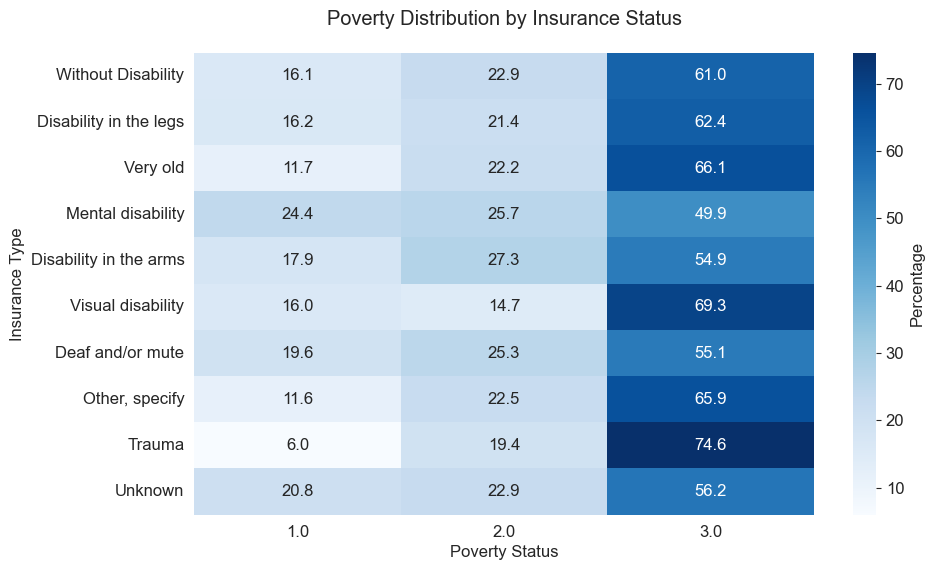

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate proportions instead of counts
poverty_insurance_perc = poverty_insurance.div(poverty_insurance['All'], axis=0) * 100
poverty_insurance_perc.drop('All', axis=1, inplace=True)
poverty_insurance_perc.drop('All', inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(poverty_insurance_perc, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Percentage'})
plt.title("Poverty Distribution by Insurance Status", pad=20)
plt.xlabel("Poverty Status")
plt.ylabel("Insurance Type")
plt.show()

<Figure size 800x600 with 0 Axes>

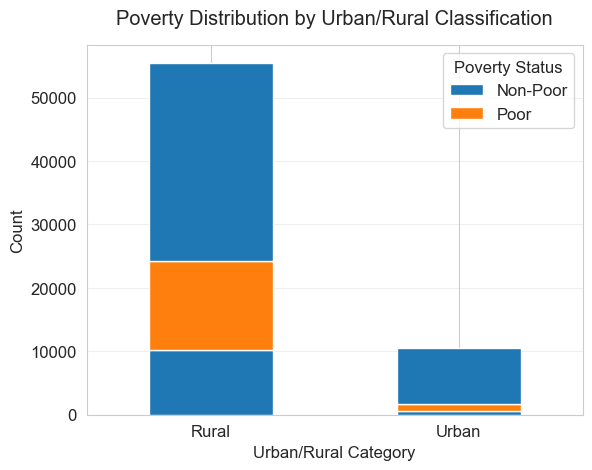

In [33]:
# Filter out 'All' margin
poverty_ur2_filtered = poverty_ur2.drop('All').drop('All', axis=1)

plt.figure(figsize=(8, 6))
poverty_ur2_filtered.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title("Poverty Distribution by Urban/Rural Classification", pad=15)
plt.xlabel("Urban/Rural Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Poverty Status", labels=['Non-Poor', 'Poor'])
plt.grid(axis='y', alpha=0.3)
plt.show()

c:\Users\educa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


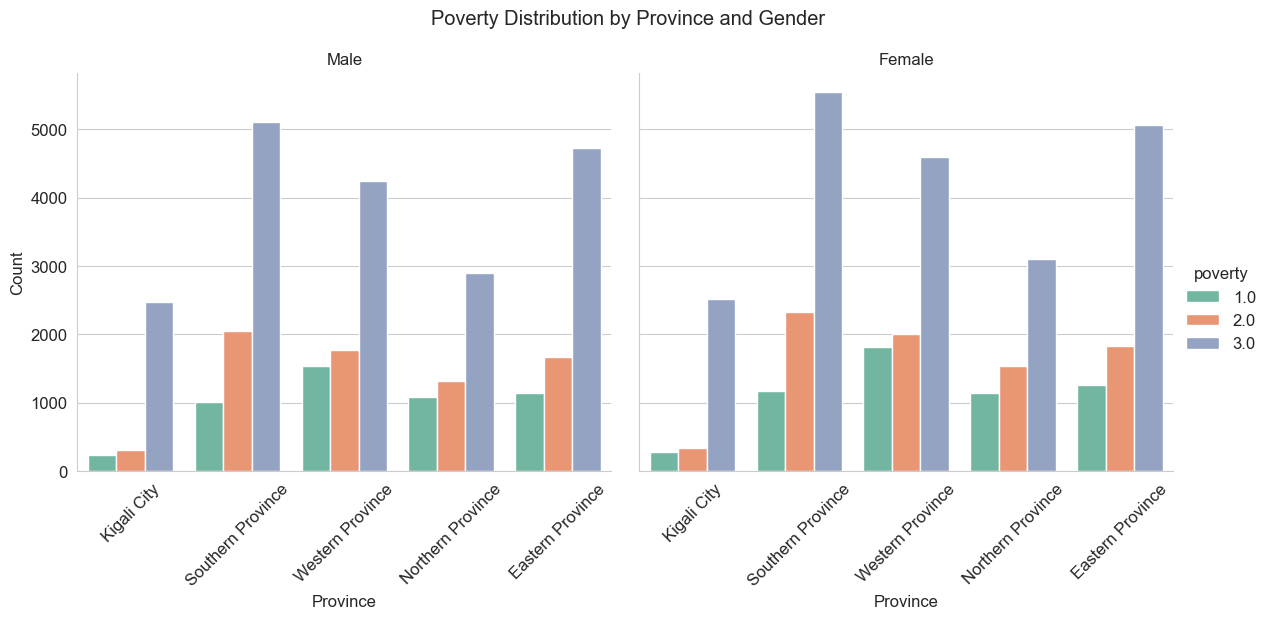

In [34]:
# Create a facet grid visualization
g = sns.catplot(
    data=data_subset.reset_index(),
    x='province',
    hue='poverty',
    col='s1q1',
    kind='count',
    palette='Set2',
    height=5,
    aspect=1.2
)
g.set_xticklabels(rotation=45)
g.set_titles("{col_name}")
g.fig.suptitle("Poverty Distribution by Province and Gender", y=1.05)
g.set_axis_labels("Province", "Count")
plt.show()

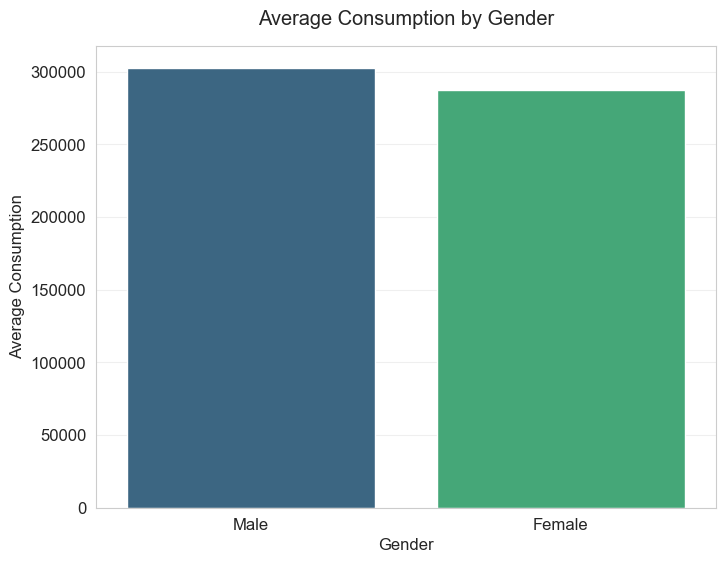

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=avg_consumption_sex.index,
    y=avg_consumption_sex.values,
    palette='viridis',
    errorbar=None
)
plt.title("Average Consumption by Gender", pad=15)
plt.xlabel("Gender")
plt.ylabel("Average Consumption")
plt.grid(axis='y', alpha=0.3)
plt.show()